In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
df = pd.read_csv("sim_data_full.csv")

In [3]:
from compute_costs import *

In [4]:
compute_costs(df)

C:\Users\joshsu\OneDrive - Bill & Melinda Gates Foundation\Code\malaria-sac-ipt\analysis\230503\compute_costs.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school["cost_IPTsc_drugs"] = df_school["iptsc_drugs_used_school"] * df_school["drug_type"].map(cost_dict)
C:\Users\joshsu\OneDrive - Bill & Melinda Gates Foundation\Code\malaria-sac-ipt\analysis\230503\compute_costs.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school["cost_IPTsc_consumables"] = df_school["cost_IPTsc_RDTs"] + df_schoo

In [5]:
df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

In [12]:
df_plot = df_pfpr[np.logical_and.reduce([
    df_pfpr["archetype"]=="Sahel",
    np.in1d(df_pfpr["scenario_number"], [6,7,8,9,30,31,32,33])])]
df_plot["cost"] = 0.5*df_plot["cost_IPTsc_mean"]
df_plot["cases_averted"] = 5000*(df_plot["clinical_incidence_all_BASELINE"]-df_plot["clinical_incidence_all"])
df_plot["cost_per_case_averted"]= df_plot["cost"]/df_plot["cases_averted"]

C:\Users\joshsu\AppData\Local\Temp\ipykernel_24716\3625137829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["cost"] = 0.5*df_plot["cost_IPTsc_mean"]
C:\Users\joshsu\AppData\Local\Temp\ipykernel_24716\3625137829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["cases_averted"] = 5000*(df_plot["clinical_incidence_all_BASELINE"]-df_plot["clinical_incidence_all"])
C:\Users\joshsu\AppData\Local\Temp\ipykernel_24716\3625137829.py:6: SettingWithCopyWarning: 
A value is trying to be set on 

In [13]:
df_plot.columns

Index(['archetype', 'baseline_transmission_metric', 'transmission_level',
       'scenario_number', 'iptsc_rdts_used', 'iptsc_drugs_used_school',
       'cases_treated', 'severe_cases_treated', 'received_smc_u5',
       'received_smc_5-10',
       ...
       'cost_primaquine', 'cost_low', 'cost_high', 'cost_mean',
       'cost_low_IPTsc_only', 'cost_high_IPTsc_only', 'cost_mean_IPTsc_only',
       'cost', 'cases_averted', 'cost_per_case_averted'],
      dtype='object', length=150)

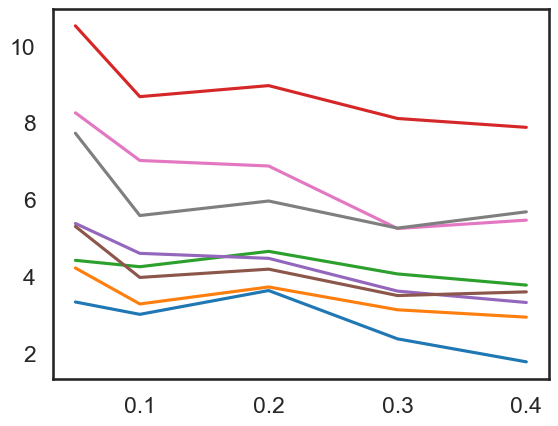

In [31]:
for s, sdf in df_plot.groupby("scenario_number"):
    plt.plot(sdf["transmission_level"], sdf["cost_per_case_averted"])

In [ ]:
df_plot

C:\Users\joshsu\AppData\Local\Temp\ipykernel_24716\2525280684.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_plot,


<Axes: xlabel='cases_averted', ylabel='cost_per_case_averted'>

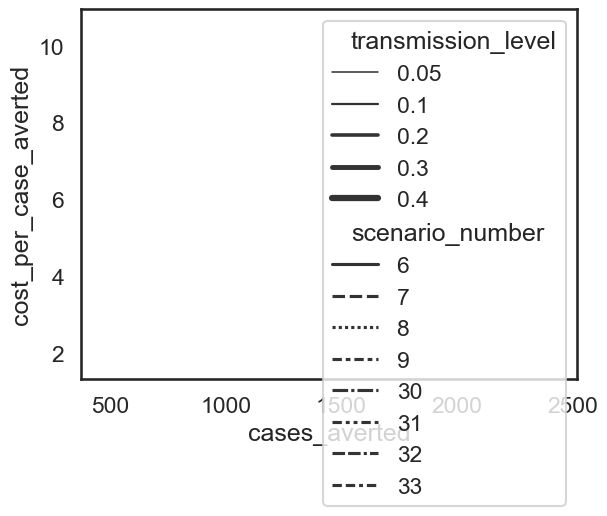

In [27]:
sns.lineplot(data=df_plot, 
             x="cases_averted", 
             y="cost_per_case_averted", size="transmission_level", style="scenario_number", palette=['red', 'green', 'blue'])

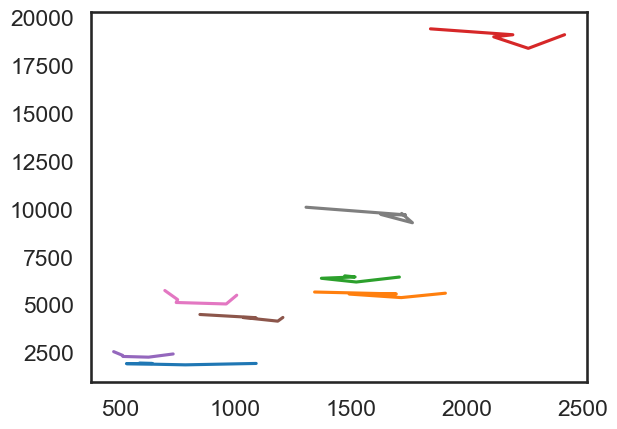

In [29]:
for s, sdf in df_plot.groupby("scenario_number"):
    plt.plot(sdf["cases_averted"], sdf["cost"])

In [16]:
df_plot[["scenario_number", "transmission_level", "cost_per_case_averted"]]

,scenario_number,transmission_level,cost_per_case_averted
156,6,0.05,3.325039
157,7,0.05,4.210189
158,8,0.05,4.409290
159,9,0.05,10.514296
180,30,0.05,5.370409
181,31,0.05,5.292465
182,32,0.05,8.250509
183,33,0.05,7.718506
194,6,0.10,3.003000
195,7,0.10,3.273640


In [11]:
cost/cases_averted

156     3.325039
157     4.210189
158     4.409290
159    10.514296
180     5.370409
181     5.292465
182     8.250509
183     7.718506
194     3.003000
195     3.273640
196     4.243063
197     8.670829
218     4.591231
219     3.964163
220     7.008888
221     5.575884
232     3.622993
233     3.715742
234     4.643250
235     8.958169
256     4.461198
257     4.180001
258     6.865304
259     5.953847
270     2.365341
271     3.122105
272     4.055335
273     8.102675
294     3.608392
295     3.492198
296     5.237792
297     5.248379
308     1.766714
309     2.929875
310     3.764022
311     7.871591
332     3.311794
333     3.588219
334     5.455868
335     5.672601
dtype: float64